In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import patches as p

In [2]:
s_b = 1
s_h = 1

In [3]:
F = np.array([[1/s_b**2 + 1/s_h**2, 1/s_h**2],
              [1/s_h**2, 1/s_h**2]])
C = np.linalg.inv(F)

In [4]:
def confidence(C, ax, mean=[0,0]):
    a = np.sqrt((C[0,0] + C[1,1])/2 + np.sqrt((C[0,0] - C[1,1])**2/4 + (C[0,1])**2))
    b = np.sqrt((C[0,0] + C[1,1])/2 - np.sqrt((C[0,0] - C[1,1])**2/4 + (C[0,1])**2))
    alpha = [1.52, 2.48, 3.44]
    theta = (np.arctan((2*C[0,1])/(C[0,0] - C[1,1])))/2 * 180/np.pi
    colors = ['black', 'gray', 'pink']
    labels = ['$1\sigma$', '$2\sigma$', '$3\sigma$']
    for i in range(len(alpha)):
        ax.add_patch(p.Ellipse(mean, alpha[i]*a, alpha[i]*b, angle=theta, facecolor='none', 
                               edgecolor=colors[i], label=labels[i], linewidth=1.5))
#     for i in np.arange(0,10,0.1):
#         ax.add_patch(p.Ellipse(mean, i*a, i*b, angle=theta, facecolor='none', 
#                                edgecolor='black', linewidth=0.5, alpha=1-i/10))
    return a, b, alpha, theta

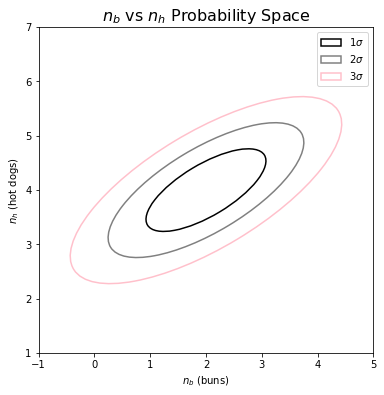

In [5]:
r = 3
fig, ax = plt.subplots(figsize=(2*r,2*r))
a, b, alpha, theta = confidence(C, ax, mean=(2,4))
ax.set_xlim((-1,5))
ax.set_ylim((1,7))
ax.set_xlabel('$n_b$ (buns)')
ax.set_ylabel('$n_h$ (hot dogs)')
ax.legend()
plt.title('$n_b$ vs $n_h$ Probability Space', size=16)
plt.savefig('test1.png', bbox_inches='tight')